<a href="https://colab.research.google.com/github/ucfilho/ANN_2021_01/blob/main/ANN_Image_Processig/Recycle_010_Image_Processing_tensor_flow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from matplotlib import pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import numpy as np
import pandas as pd
import cv2
import random
import zipfile 
from keras.models import Sequential
from keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization

In [2]:
!git clone https://github.com/ucfilho/ANN_2021_01/
%cd ANN_2021_01

fatal: destination path 'ANN_2021_01' already exists and is not an empty directory.
/content/ANN_2021_01


In [3]:
file_name = zipfile.ZipFile('trash.zip', 'r')
file_name.extractall()

In [4]:
# all images are load in variable x...
FILE='trash.zip'
Img_Size = 28
img_name=[]
x_gray=[]
x_original = []
with zipfile.ZipFile(FILE, "r") as f:
    for name in f.namelist():
        img_name.append(name)

In [5]:
y_names = []
for yy in img_name:
  name = yy[0]+yy[1]+yy[2]
  y_names.append(name)

In [6]:
unique_list = []    
for yy in y_names:
  if yy not in unique_list:
    unique_list.append(yy)

In [7]:
n = len(unique_list)
y = []
for yy in y_names:
  for i in range(n):
    if(yy == unique_list[i]):
      y.append(i)

In [8]:
DATASET_SIZE = len(y_names)
Ind = range(DATASET_SIZE)

In [9]:
Ind_train, Ind_test= train_test_split(Ind,test_size=0.20, shuffle=True, random_state=3)

In [10]:
X_train = []
Y_train = []
for II in Ind_train:
  name = img_name[II]
  X_train.append(cv2.resize(cv2.imread(name,0),(Img_Size,Img_Size)))
  Y_train.append(y[II])

In [11]:
X_test = []
Y_test = []
for II in Ind_test:
  name = img_name[II]
  X_test.append(cv2.resize(cv2.imread(name,0),(Img_Size,Img_Size)))
  Y_test.append(y[II])

In [12]:
# helper
def ynindicator(Y):
  N = len(Y)
  K = len(set(Y))
  I = np.zeros((N, K))
  I[np.arange(N), Y] = 1
  return I

X_train = np.array(X_train)
Y_train = np.array(Y_train)
K = len(set(Y_train))

X_train = X_train.reshape(-1, Img_Size, Img_Size, 1) / 255.0
Y_train = Y_train.astype(np.int32)
Y_train = ynindicator(Y_train)

X_test = np.array(X_test )
Y_test = np.array(Y_test)
X_test = X_test.reshape(-1, Img_Size, Img_Size, 1) / 255.0
Y_test = Y_test.astype(np.int32)
Y_test = ynindicator(Y_test)

# the model will be a sequence of layers

model = Sequential()


# make the CNN
# model.add(Input(shape=(28, 28, 1)))
model.add(Conv2D(input_shape=(Img_Size, Img_Size, 1), filters=32, kernel_size=(3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(filters=64, kernel_size=(3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(filters=128, kernel_size=(3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(units=300))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(units=K))
model.add(Activation('softmax'))


# list of losses: https://keras.io/losses/
# list of optimizers: https://keras.io/optimizers/
# list of metrics: https://keras.io/metrics/
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)



In [13]:
# gives us back a <keras.callbacks.History object at 0x112e61a90>
r = model.fit(X_train, Y_train, epochs=15, batch_size=32)
print("Returned:", r)


Epoch 1/15
17/17 [==============================] - 21s 46ms/step - loss: 1.7880 - accuracy: 0.2769
Epoch 2/15
17/17 [==============================] - 1s 46ms/step - loss: 1.2872 - accuracy: 0.5178
Epoch 3/15
17/17 [==============================] - 1s 45ms/step - loss: 1.1304 - accuracy: 0.5733
Epoch 4/15
17/17 [==============================] - 1s 46ms/step - loss: 0.9225 - accuracy: 0.6915
Epoch 5/15
17/17 [==============================] - 1s 47ms/step - loss: 0.7394 - accuracy: 0.7723
Epoch 6/15
17/17 [==============================] - 1s 46ms/step - loss: 0.5820 - accuracy: 0.7920
Epoch 7/15
17/17 [==============================] - 1s 47ms/step - loss: 0.4968 - accuracy: 0.8664
Epoch 8/15
17/17 [==============================] - 1s 47ms/step - loss: 0.3611 - accuracy: 0.8865
Epoch 9/15
17/17 [==============================] - 1s 46ms/step - loss: 0.2237 - accuracy: 0.9468
Epoch 10/15
17/17 [==============================] - 1s 46ms/step - loss: 0.1669 - accuracy: 0.9670
Epoch 11

In [14]:

# print the available keys
# should see: dict_keys(['val_loss', 'acc', 'loss', 'val_acc'])
print(r.history.keys())

dict_keys(['loss', 'accuracy'])


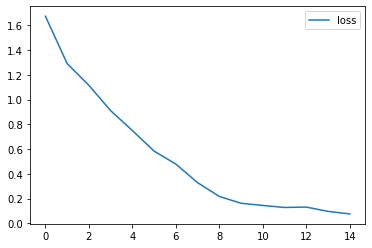

In [15]:

# plot some data
plt.plot(r.history['loss'], label='loss')
#plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()


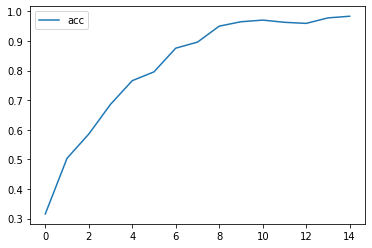

In [16]:
# accuracies
plt.plot(r.history['accuracy'], label='acc')
#plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()

In [17]:
ynew = model.predict_classes(X_test)
print(ynew)

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


[0 0 0 4 0 0 0 0 0 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4 0 0 0 0 0 0 0 4 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 4 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [18]:
y_resp = (model.predict(X_test) > 0.5).astype("int32")
#print(y_resp)

[[1 0 0 0 0 0]
 [1 0 0 0 0 0]
 [1 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [1 0 0 0 0 0]
 [1 0 0 0 0 0]
 [1 0 0 0 0 0]
 [1 0 0 0 0 0]
 [0 0 0 0 0 0]
 [1 0 0 0 0 0]
 [1 0 0 0 0 0]
 [1 0 0 0 0 0]
 [1 0 0 0 0 0]
 [1 0 0 0 0 0]
 [1 0 0 0 0 0]
 [1 0 0 0 0 0]
 [1 0 0 0 0 0]
 [1 0 0 0 0 0]
 [1 0 0 0 0 0]
 [1 0 0 0 0 0]
 [1 0 0 0 0 0]
 [1 0 0 0 0 0]
 [1 0 0 0 0 0]
 [1 0 0 0 0 0]
 [1 0 0 0 0 0]
 [1 0 0 0 0 0]
 [1 0 0 0 0 0]
 [1 0 0 0 0 0]
 [1 0 0 0 0 0]
 [1 0 0 0 0 0]
 [1 0 0 0 0 0]
 [1 0 0 0 0 0]
 [1 0 0 0 0 0]
 [0 0 0 0 0 0]
 [1 0 0 0 0 0]
 [1 0 0 0 0 0]
 [1 0 0 0 0 0]
 [1 0 0 0 0 0]
 [1 0 0 0 0 0]
 [1 0 0 0 0 0]
 [1 0 0 0 0 0]
 [0 0 0 0 0 0]
 [1 0 0 0 0 0]
 [1 0 0 0 0 0]
 [1 0 0 0 0 0]
 [1 0 0 0 0 0]
 [1 0 0 0 0 0]
 [1 0 0 0 0 0]
 [1 0 0 0 0 0]
 [1 0 0 0 0 0]
 [0 0 0 0 0 0]
 [1 0 0 0 0 0]
 [1 0 0 0 0 0]
 [0 0 0 0 0 0]
 [1 0 0 0 0 0]
 [1 0 0 0 0 0]
 [1 0 0 0 0 0]
 [1 0 0 0 0 0]
 [1 0 0 0 0 0]
 [1 0 0 0 0 0]
 [1 0 0 0 0 0]
 [0 0 0 0 0 0]
 [1 0 0 0 0 0]
 [1 0 0 0 0 0]
 [1 0 0 0 0 0]
 [1 0 0 0 

In [25]:
model.predict(X_test)

array([[7.29000509e-01, 1.46041483e-01, 9.15258750e-03, 5.11216931e-03,
        7.70052299e-02, 3.36880088e-02],
       [8.31239402e-01, 1.77932009e-02, 2.64011417e-02, 6.10621693e-03,
        1.13468267e-01, 4.99179261e-03],
       [7.75780082e-01, 4.55354042e-02, 9.72030126e-03, 1.35409320e-02,
        1.49288863e-01, 6.13435358e-03],
       [3.75514388e-01, 1.26956537e-01, 2.81231813e-02, 9.08774324e-03,
        4.43891585e-01, 1.64266359e-02],
       [4.04902101e-01, 9.82169509e-02, 5.10777310e-02, 8.68193991e-03,
        4.00869548e-01, 3.62516865e-02],
       [7.44741976e-01, 2.71636695e-02, 5.18492563e-03, 3.14851962e-02,
        1.85169354e-01, 6.25490025e-03],
       [9.13138688e-01, 2.10679919e-02, 1.89184793e-03, 1.26825115e-02,
        4.58824225e-02, 5.33654075e-03],
       [8.66727114e-01, 7.14306580e-03, 4.35845368e-03, 1.77902132e-02,
        1.02560565e-01, 1.42062595e-03],
       [7.28965104e-01, 2.87433174e-02, 1.20608676e-02, 1.57518033e-02,
        2.09553346e-01, 

In [27]:
(model.predict(X_test)[0] > 0.5).astype("int32")

array([1, 0, 0, 0, 0, 0], dtype=int32)

In [19]:
y_class = np.zeros(len(Ind_test),dtype=int)
for k in range(len(Ind_test)):
  for kk in range(K):
    if(Y_test[k,kk] == 1):
      y_class[k] = kk
print(y_class)
y_true = y_class.copy()

[1 5 4 2 2 4 3 3 2 4 4 3 3 3 5 3 2 0 4 0 0 1 1 5 3 1 0 4 0 4 1 2 2 1 2 4 5
 2 5 0 4 3 2 0 2 0 3 0 4 0 2 1 0 0 5 5 3 1 0 2 4 1 1 2 5 0 4 5 4 2 4 2 3 0
 0 2 1 4 5 2 3 3 5 1 1 3 1 5 2 3 5 3 1 0 1 5 2 0 4 2 4 0 2 4 1 4 2 1 4 1 1
 0 3 1 1 2 4 0 4 0 4 5 0 1 1 3 1 4 2 0 5 3 0 4 4]


In [20]:
Y_test[-2,:]

array([0., 0., 0., 0., 1., 0.])

In [21]:
y_class = np.zeros(len(Ind_test),dtype=int)
for k in range(len(Ind_test)):
  for kk in range(K):
    if(y_resp[k,kk] == 1):
      y_class[k] = kk
y_pred = y_class.copy()

In [24]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0])

In [22]:
target_names = ['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

   cardboard       0.19      1.00      0.31        25
       glass       0.00      0.00      0.00        25
       metal       0.00      0.00      0.00        24
       paper       0.00      0.00      0.00        19
     plastic       0.00      0.00      0.00        26
       trash       0.00      0.00      0.00        16

    accuracy                           0.19       135
   macro avg       0.03      0.17      0.05       135
weighted avg       0.03      0.19      0.06       135



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [23]:
y_true

array([1, 5, 4, 2, 2, 4, 3, 3, 2, 4, 4, 3, 3, 3, 5, 3, 2, 0, 4, 0, 0, 1,
       1, 5, 3, 1, 0, 4, 0, 4, 1, 2, 2, 1, 2, 4, 5, 2, 5, 0, 4, 3, 2, 0,
       2, 0, 3, 0, 4, 0, 2, 1, 0, 0, 5, 5, 3, 1, 0, 2, 4, 1, 1, 2, 5, 0,
       4, 5, 4, 2, 4, 2, 3, 0, 0, 2, 1, 4, 5, 2, 3, 3, 5, 1, 1, 3, 1, 5,
       2, 3, 5, 3, 1, 0, 1, 5, 2, 0, 4, 2, 4, 0, 2, 4, 1, 4, 2, 1, 4, 1,
       1, 0, 3, 1, 1, 2, 4, 0, 4, 0, 4, 5, 0, 1, 1, 3, 1, 4, 2, 0, 5, 3,
       0, 4, 4])